# Table of Contents

1. [Objective](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Json Data file on to MongoDB](#section3)<br>
4. [Creating Schema for all the Datasets](#section4)<br>
5. [Creating  Master Database](#section5)
    - 5.1 [Loading Covid Death Data in to Master Database](#section501)
    - 5.2 [Loading Mental State Data in to Master Database](#section501)
    - 5.3 [Loading Nursing Data in to Master Database](#section501)
    - 5.4 [Loading Covid Hospital Data in to Master Database](#section501)
5. [Creating Database and Required Tables](#section5)
6. [Apply Joining and Lookup on Postgresql Database](#section6)



## 1. Objective<a id=section1></a>

In depth analysis on Covid-19 Death, Nursing Home, Mental Health and Covid Hospital datasets to indentify key insights.
The analysis was carried out with the help of appropriate databases and libraries such as mongoDB , Postgresql, Pandas, NumPy and, Plotly.

<a id=section2></a>
## 2. Importing Packages

In [1]:
# Import libraries
import pymongo as md
from pymongo import MongoClient
from bson import ObjectId
import json
import pprint
import psycopg2
import pandas.io.sql as sqlio
import pandas as pd
import plotly as pl 
import plotly.express as px
import plotly.graph_objects as go
import fuzzymatcher 

from plotly.subplots import make_subplots

In [2]:
# !pip install fuzzymatcher

In [3]:
usr='postgres'
pwd='abcd1234'

<a id=section3></a>
## 3. Calling al the  Required Jupyter Notebook

Connection established Successful!
Json Data Loaded Successfully
Connection Successful!
Data Retreive Successfully


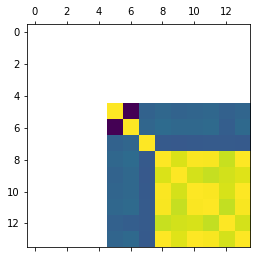

/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/pandas_profiling/profile_report.py:283: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/pandas_profiling/profile_report.py:283: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(



Error while connecting to PostgreSQL database "coviddb" already exists

Error while connecting to PostgreSQL relation "coviddata" already exists

Connected!


<ipython-input-4-5f6320ad0fe4>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



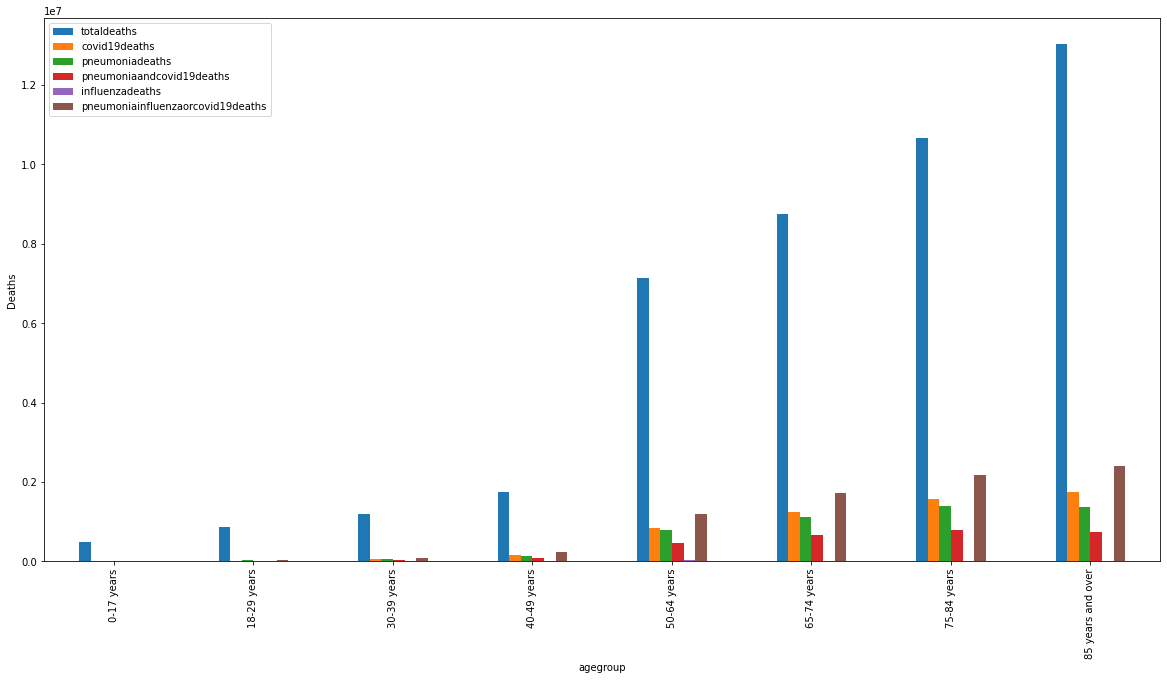

In [4]:
%run ./x20122136_CovidData.ipynb

File Loaded Successfully
Connection Successful!
Connection Successful!
Data stored in Dataframe
110
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9082 entries, 0 to 9081
Data columns (total 31 columns):
 #   Column                                                                                         Non-Null Count  Dtype 
---  ------                                                                                         --------------  ----- 
 0   Week Ending                                                                                    9082 non-null   object
 1   Provider Name                                                                                  9082 non-null   object
 2   Provider City                                                                                  9082 non-null   object
 3   Residents Total Admissions COVID-19                                                            9031 non-null   object
 4   Residents Total Confirmed COVID-19                

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9082 entries, 0 to 9081
Data columns (total 31 columns):
 #   Column                                                                                         Non-Null Count  Dtype 
---  ------                                                                                         --------------  ----- 
 0   Week Ending                                                                                    9082 non-null   object
 1   Provider Name                                                                                  9082 non-null   object
 2   Provider City                                                                                  9082 non-null   object
 3   Residents Total Admissions COVID-19                                                            9082 non-null   int64 
 4   Residents Total Confirmed COVID-19                                                             9082 non-null   int64 
 5   Residents Total Suspected C

/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/pandas_profiling/profile_report.py:283: UserWarning:

Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9082 entries, 0 to 9081
Data columns (total 31 columns):
 #   Column                                                                           Non-Null Count  Dtype 
---  ------                                                                           --------------  ----- 
 0   weekending                                                                       9082 non-null   object
 1   providername                                                                     9082 non-null   object
 2   providercity                                                                     9082 non-null   object
 3   residentstotaladmissionscovid-19                                                 9082 non-null   int64 
 4   residentstotalconfirmedcovid-19                                                  9082 non-null   int64 
 5   residentstotalsuspectedcovid-19                                                  9082 non-null   int64 
 6   residentsweekly

<ipython-input-5-397c0ef9cfad>:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<ipython-input-5-53aa29cd0365>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-5-53aa29cd0365>:7: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:321: MatplotlibDeprecationWarning:


The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.

/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.

/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:321: MatplotlibDeprecationWarning:


The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.

/Users/adityaraj/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning:


The is_

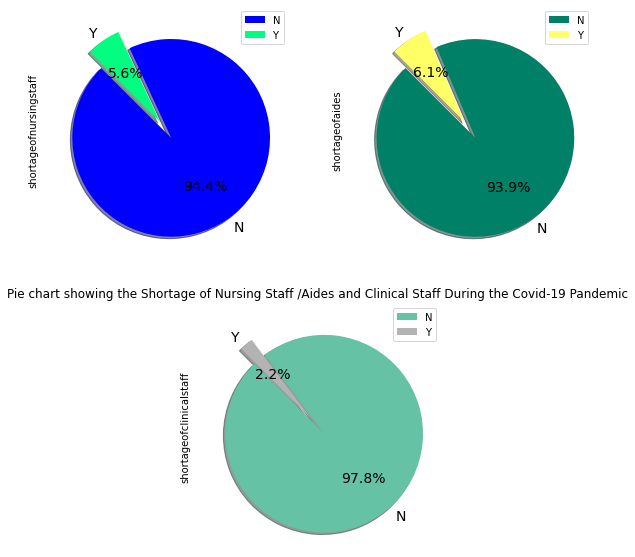

<ipython-input-5-38615d9b7c17>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-5-38615d9b7c17>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-5-38615d9b7c17>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-5-5c46d77f70a3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-5-55518b446481>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



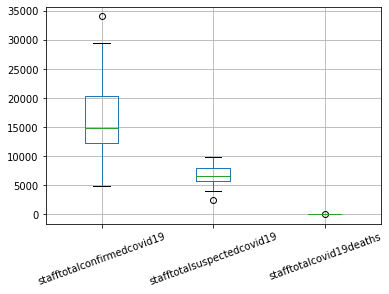

In [5]:
%run ./x19220618_NursingData.ipynb

Connected!
Connection Successful!
['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at', 'updated_meta', 'meta', 'state', 'date', 'critical_staffing_shortage_today_yes', 'critical_staffing_shortage_today_no', 'critical_staffing_shortage_today_not_reported', 'critical_staffing_shortage_anticipated_within_week_yes', 'critical_staffing_shortage_anticipated_within_week_no', 'critical_staffing_shortage_anticipated_within_week_not_reported', 'hospital_onset_covid', 'hospital_onset_covid_coverage', 'inpatient_beds', 'inpatient_beds_coverage', 'inpatient_beds_used', 'inpatient_beds_used_coverage', 'inpatient_beds_used_covid', 'inpatient_beds_used_covid_coverage', 'previous_day_admission_adult_covid_confirmed', 'previous_day_admission_adult_covid_confirmed_coverage', 'previous_day_admission_adult_covid_suspected', 'previous_day_admission_adult_covid_suspected_coverage', 'previous_day_admission_pediatric_covid_confirmed', 'previous_day_admission_pediatric_covid_confirmed_coverage'

Series([], dtype: int64)
Connected!
Error while connecting to PostgreSQL database "coviddb" already exists

Error while connecting to PostgreSQL relation "covid_hospital" already exists

      state        date  critical_staffing_shortage_today_yes  \
0        IA  2021-01-03                                   6.0   
1        ID  2021-01-03                                   4.0   
2        IL  2021-01-03                                  19.0   
3        IN  2021-01-03                                  22.0   
4        KS  2021-01-03                                  10.0   
...     ...         ...                                   ...   
17503    NJ  2020-09-21                                  11.0   
17504    NM  2020-09-21                                  13.0   
17505    NV  2020-09-21                                   4.0   
17506    NY  2020-09-21                                   9.0   
17507    OH  2020-09-21                                   9.0   

       critical_staffing_shortag

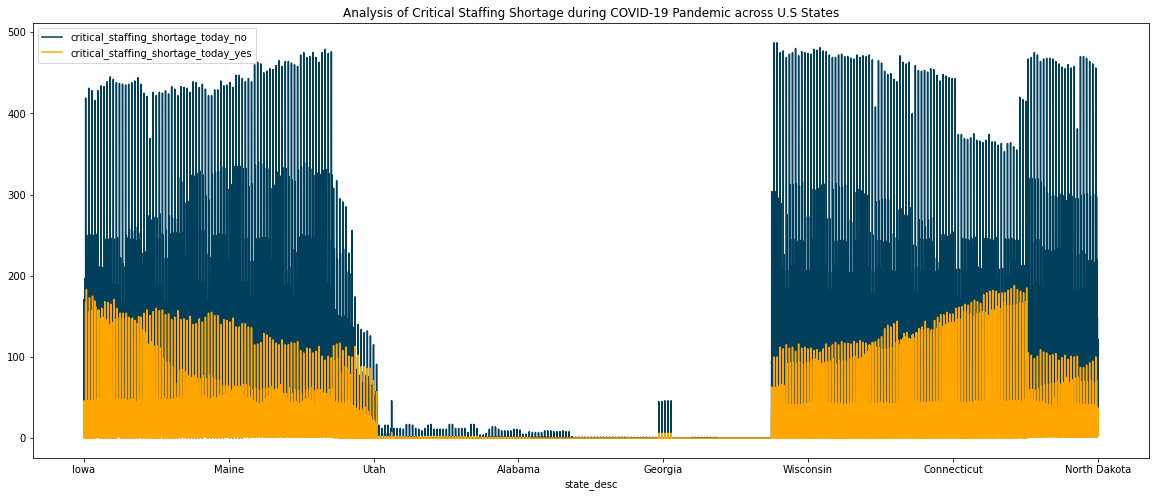

Latest Record Date in the Dataset 2021-03-27
Oldest Record Date in the Dataset 2020-03-03


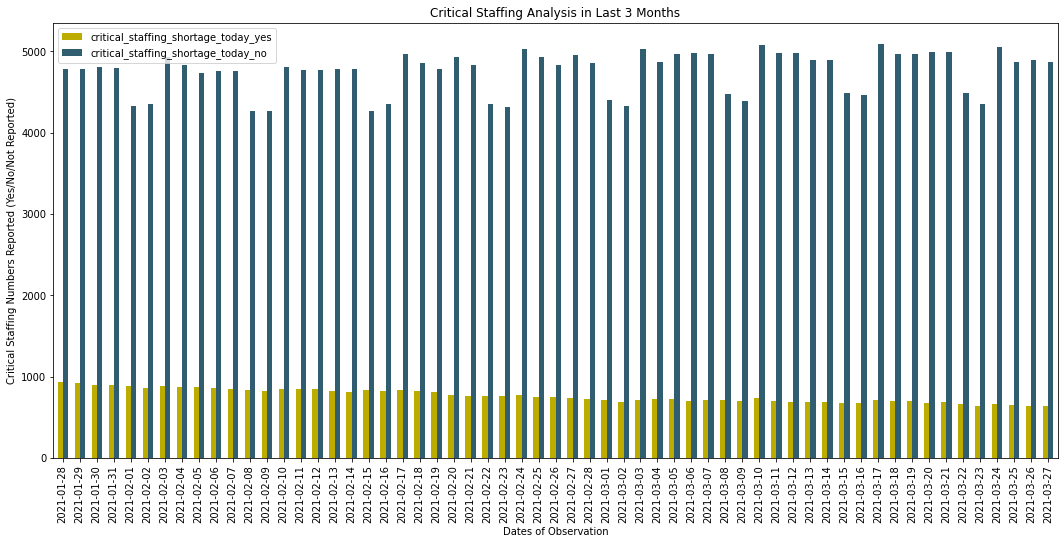

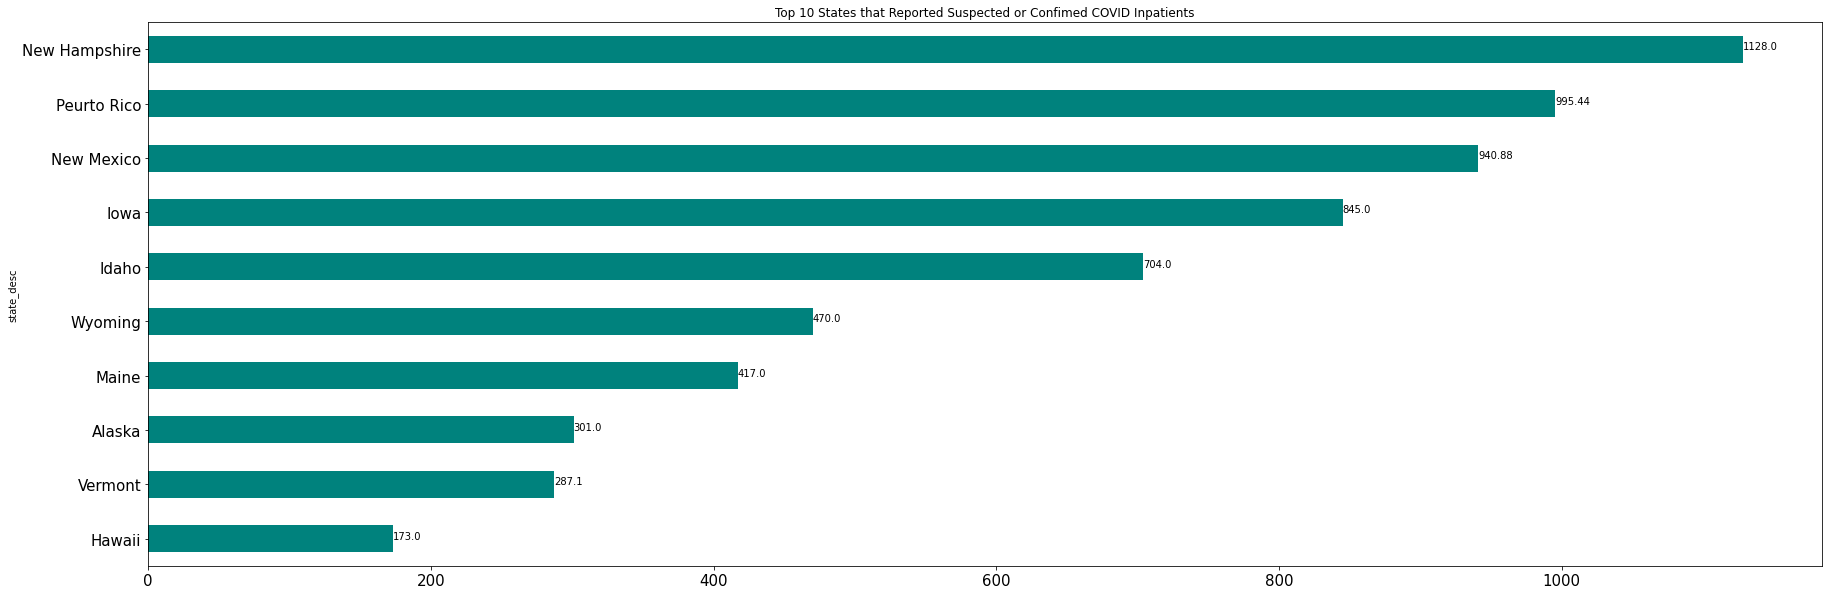

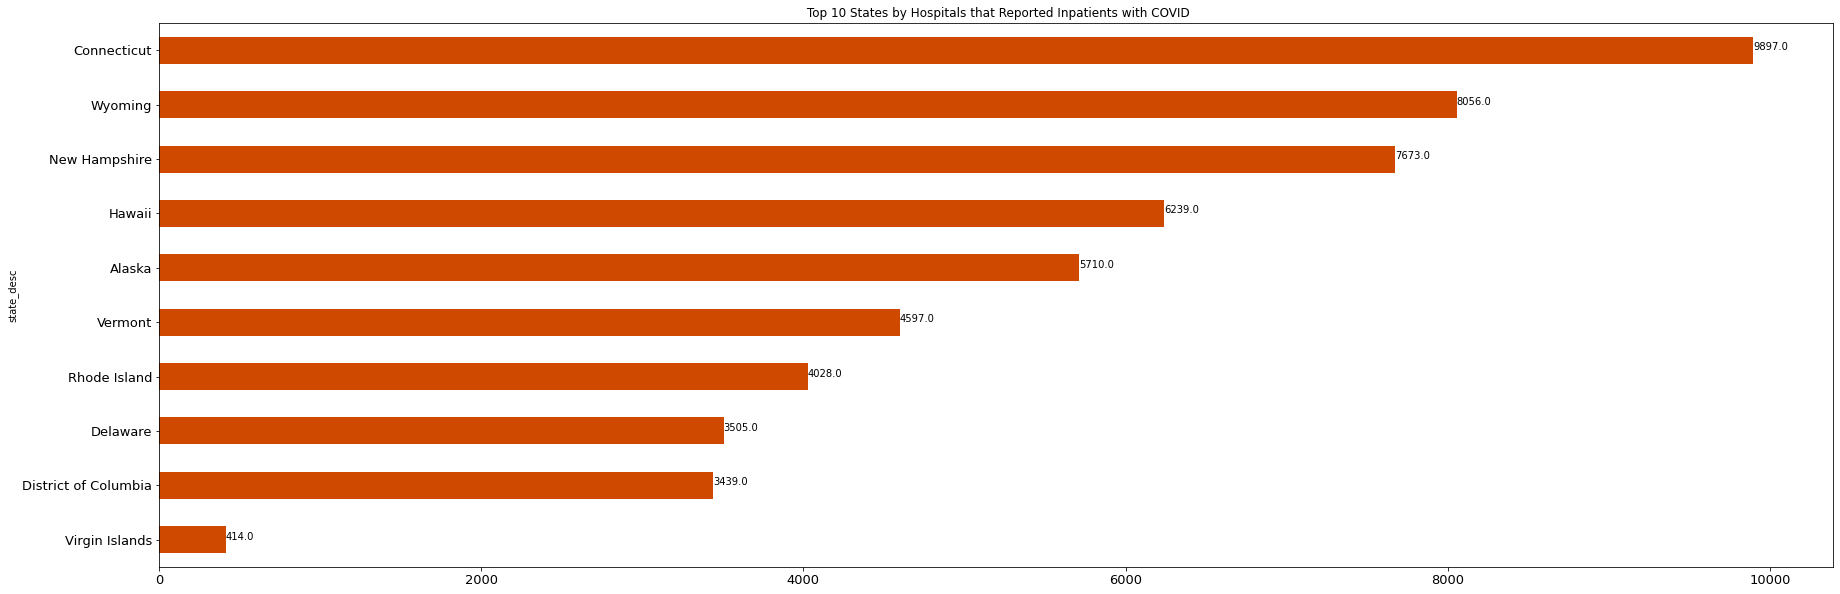

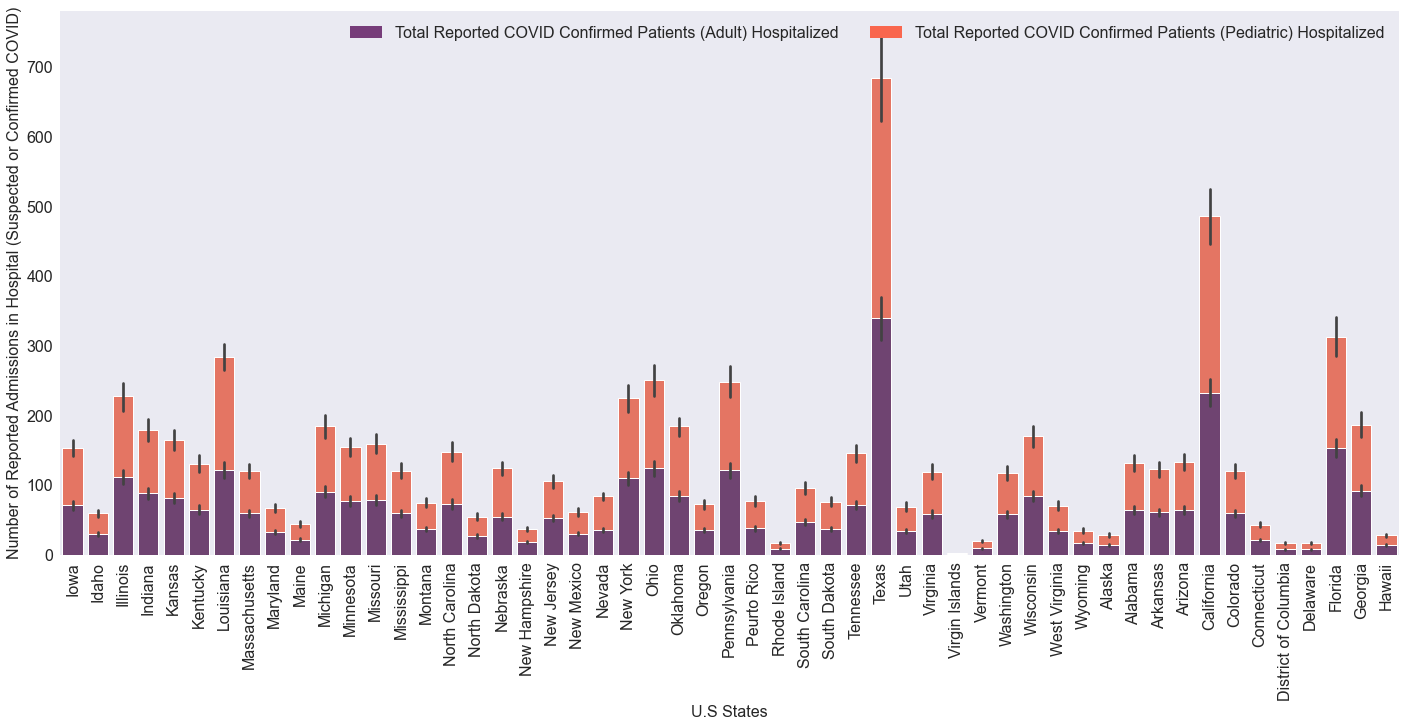

In [6]:
%run ./x20143311_Hospital.ipynb

In [7]:
# conda install -c conda-forge fuzzymatcher

Connection successful!
File closed!
['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at', 'updated_meta', 'meta', 'Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period', 'Time Period Label', 'Time Period Start Date', 'Time Period End Date', 'Value', 'Low CI', 'High CI', 'Confidence Interval', 'Quartile Range']
                           0
Indicator                  0
Group                      0
State                      0
Subgroup                   0
Phase                      0
Time Period                0
Time Period Label          0
Time Period Start Date     0
Time Period End Date       0
Value                    114
Low CI                   114
High CI                  114
Confidence Interval      114
Quartile Range          1596
                           0
Indicator                  0
Group                      0
State                      0
Subgroup                   0
Phase                      0
Time Period                0
Time Period Label      

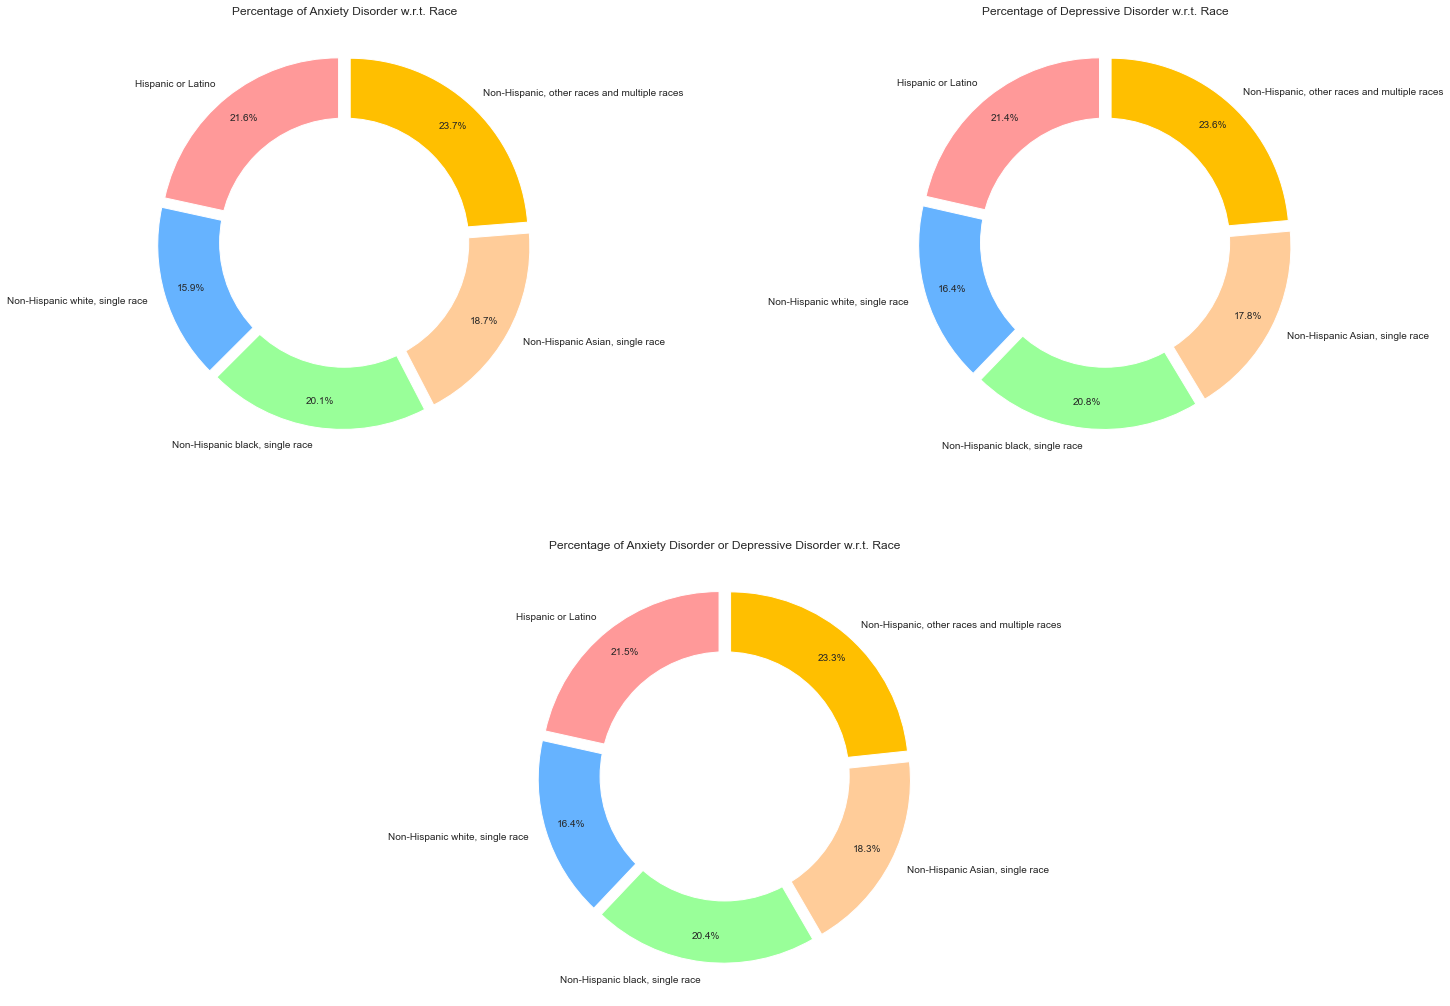

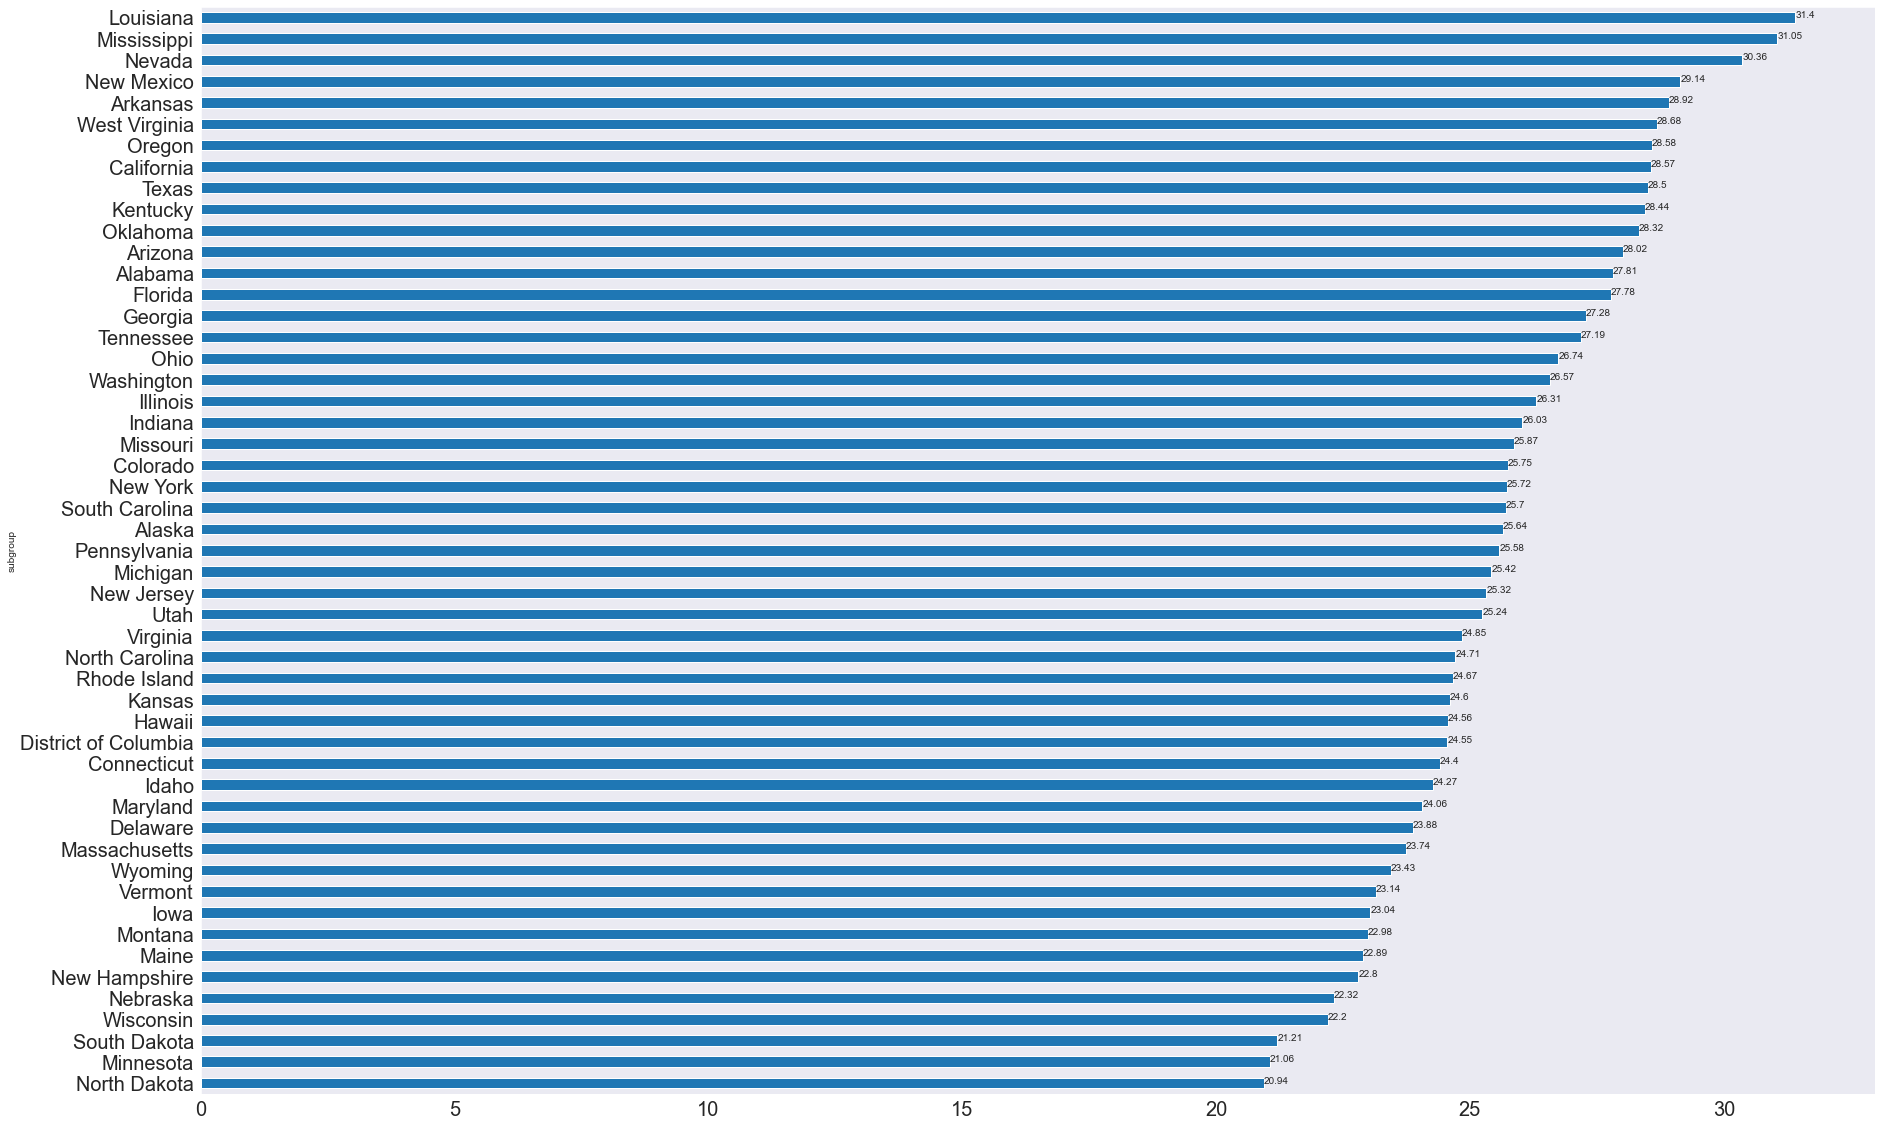

In [8]:
%run ./x20150377_MentalState.ipynb

<a id=section4></a>
## 4. Creating Schema for all the datasets

<a id=section5></a>
## 5 Creating  Master Database in Postgresql

In [9]:
import psycopg2
dbConnection1 = psycopg2.connect(user = usr,password = pwd, host = "localhost",port = "5432")
dbConnection1.set_isolation_level(0) # AUTOCOMMIT
dbCursor1 = dbConnection1.cursor()

try:
    dbCursor1.execute('CREATE DATABASE coviddb;')
    dbCursor1.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection1): dbConnection1.close()

Error while connecting to PostgreSQL database "coviddb" already exists



In [10]:
import psycopg2
dbConnection1 = psycopg2.connect(user = usr,password = pwd, host = "localhost",port = "5432", database = 'coviddb')
dbConnection1.set_isolation_level(0) # AUTOCOMMIT
dbCursor1 = dbConnection1.cursor()

try:
    #dbCursor1.execute('CREATE DATABASE coviddb;')
#     dbCursor1.execute(createCovidTable)
    dbCursor1.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection1): dbConnection1.close()

<a id=section501></a>
### 5.1 Loading Covid Death Data in to Master Database


In [11]:
sql1 = """SELECT * FROM coviddata;"""
dbConnection1 = psycopg2.connect(user = usr,password = pwd,host = "localhost",port = "5432",database = "coviddb")
covid_dataframe = sqlio.read_sql_query(sql1, dbConnection1)
covidTableStrData = pd.DataFrame().from_dict(covid_dataframe)
covidTableStrData

startdate     enddate    groups  year  month  hhsregion  \
0      2020-01-01  2021-03-20  By Total  2020      1          0   
1      2020-01-01  2021-03-20  By Total  2020      1          0   
2      2020-01-01  2021-03-20  By Total  2020      1          0   
3      2020-01-01  2021-03-20  By Total  2020      1          0   
4      2020-01-01  2021-03-20  By Total  2020      1          0   
...           ...         ...       ...   ...    ...        ...   
33846  2020-01-01  2020-01-31  By Month  2020      1          1   
33847  2020-01-01  2020-01-31  By Month  2020      1          1   
33848  2020-01-01  2020-01-31  By Month  2020      1          1   
33849  2020-08-01  2020-08-31  By Month  2020      8          5   
33850  2020-08-01  2020-08-31  By Month  2020      8          5   

               state                 placeofdeath     agegroup  covid19deaths  \
0      United States  Total - All Places of Death     All Ages       526027.0   
1      United States  Total - All Places of Death   0-17 years          238.0   
2      United States  Total - All Places of Death  18-29 years         1916.0   
3      United States  Total - All Places of Death  30-39 years         5583.0   
4      United States  Total - All Places of Death  40-49 years        15134.0   
...              ...                          ...          ...            ...   
33846        Vermont       Place of death unknown  50-64 years            0.0   
33847        Vermont       Place of death unknown  65-74 years            0.0   
33848        Vermont       Place of death unknown  75-84 years            0.0   
33849      Wisconsin                        Other   0-17 years            0.0   
33850      Wisconsin                        Other  18-29 years            0.0   

       totaldeaths  pneumoniadeaths  pneumoniaandcovid19deaths  \
0        4035809.0         453484.0                   255848.0   
1          38250.0            646.0                       44.0   
2          72834.0           2109.0                      850.0   
3         103647.0           5088.0                     2561.0   
4         156430.0          12934.0                     7445.0   
...            ...              ...                        ...   
33846          0.0              0.0                        0.0   
33847          0.0              0.0                        0.0   
33848          0.0              0.0                        0.0   
33849         84.0              0.0                        0.0   
33850         32.0              0.0                        0.0   

       influenzadeaths  pneumoniainfluenzaorcovid19deaths  
0               9004.0                           731429.0  
1                179.0                             1019.0  
2                150.0                             3313.0  
3                318.0                             8406.0  
4                494.0                            21048.0  
...                ...                                ...  
33846              0.0                                0.0  
33847              0.0                                0.0  
33848              0.0                                0.0  
33849              0.0                                0.0  
33850              0.0                                0.0  

[33851 rows x 15 columns]

In [12]:
for column in covidTableStrData:
     print(column)

startdate
enddate
groups
year
month
hhsregion
state
placeofdeath
agegroup
covid19deaths
totaldeaths
pneumoniadeaths
pneumoniaandcovid19deaths
influenzadeaths
pneumoniainfluenzaorcovid19deaths


<a id=section502></a>
## 5.2 Loading  Mental State Data in to Master Database


In [13]:
sql2 = """SELECT * FROM mentalstate;"""
dbConnection2 = psycopg2.connect(user = usr,password = pwd,host = "localhost",port = "5432",database = "coviddb")
mentalstate_dataframe = sqlio.read_sql_query(sql2, dbConnection2)
mentalStateTableStrData = pd.DataFrame().from_dict(mentalstate_dataframe)
mentalStateTableStrData

indicator             groups  \
0                       Symptoms of Depressive Disorder  National Estimate   
1                       Symptoms of Depressive Disorder             By Age   
2                       Symptoms of Depressive Disorder             By Age   
3                       Symptoms of Depressive Disorder             By Age   
4                       Symptoms of Depressive Disorder             By Age   
...                                                 ...                ...   
5569  Symptoms of Anxiety Disorder or Depressive Dis...           By State   
5570  Symptoms of Anxiety Disorder or Depressive Dis...           By State   
5571  Symptoms of Anxiety Disorder or Depressive Dis...           By State   
5572  Symptoms of Anxiety Disorder or Depressive Dis...           By State   
5573  Symptoms of Anxiety Disorder or Depressive Dis...           By State   

              state       subgroup               phase  timeperiod  \
0     United States  United States                   1         1.0   
1     United States  18 - 29 years                   1         1.0   
2     United States  30 - 39 years                   1         1.0   
3     United States  40 - 49 years                   1         1.0   
4     United States  50 - 59 years                   1         1.0   
...             ...            ...                 ...         ...   
5569       Virginia       Virginia  3 (Jan 6 � Mar 15)        26.0   
5570     Washington     Washington  3 (Jan 6 � Mar 15)        26.0   
5571  West Virginia  West Virginia  3 (Jan 6 � Mar 15)        26.0   
5572      Wisconsin      Wisconsin  3 (Jan 6 � Mar 15)        26.0   
5573        Wyoming        Wyoming  3 (Jan 6 � Mar 15)        26.0   

     timeperiodlabel timeperiodstartdate timeperiodenddate  value  lowci  \
0     Apr 23 - May 5          2020-04-23        2020-05-05   23.5   22.7   
1     Apr 23 - May 5          2020-04-23        2020-05-05   32.7   30.2   
2     Apr 23 - May 5          2020-04-23        2020-05-05   25.7   24.1   
3     Apr 23 - May 5          2020-04-23        2020-05-05   24.8   23.3   
4     Apr 23 - May 5          2020-04-23        2020-05-05   23.2   21.5   
...              ...                 ...               ...    ...    ...   
5569  Mar 3 - Mar 15          2021-03-03        2021-03-15   34.3   30.5   
5570  Mar 3 - Mar 15          2021-03-03        2021-03-15   37.3   34.1   
5571  Mar 3 - Mar 15          2021-03-03        2021-03-15   43.5   36.6   
5572  Mar 3 - Mar 15          2021-03-03        2021-03-15   31.7   27.0   
5573  Mar 3 - Mar 15          2021-03-03        2021-03-15   36.1   31.6   

      highci  confidenceinterval  quartilerange  
0       24.3               23.50          27.85  
1       35.2               32.70          27.85  
2       27.3               25.70          27.85  
3       26.2               24.75          27.85  
4       25.0               23.25          27.85  
...      ...                 ...            ...  
5569    38.2               34.35          34.70  
5570    40.6               37.35          37.40  
5571    50.6               43.60          43.00  
5572    36.6               31.80          29.60  
5573    40.8               36.20          37.40  

[5574 rows x 14 columns]

In [14]:
for column in mentalStateTableStrData:
     print(column)

indicator
groups
state
subgroup
phase
timeperiod
timeperiodlabel
timeperiodstartdate
timeperiodenddate
value
lowci
highci
confidenceinterval
quartilerange


<a id=section503></a>
### 5.3 Loading Nursing Data on to Master Database

In [15]:
sql3 = """SELECT * FROM nursingdata;"""
dbConnection3 = psycopg2.connect(user = usr,password = pwd, host = "localhost",port = "5432",database = "coviddb")
nursing_dataframe = sqlio.read_sql_query(sql3, dbConnection3)
nursingTableStrData = pd.DataFrame().from_dict(nursing_dataframe)
nursingTableStrData

weekending                              providername providercity  \
0     2020-05-24            NORTHBRIDGE HEALTH CARE CENTER   BRIDGEPORT   
1     2020-05-24  ORCHARD GROVE SPECIALTY CARE CENTER, LLC   UNCASVILLE   
2     2020-07-19                    WATROUS NURSING CENTER      MADISON   
3     2020-06-28                 APPLE REHAB SHELTON LAKES      SHELTON   
4     2020-09-13                    REGALCARE AT GREENWICH    GREENWICH   
...          ...                                       ...          ...   
9077  2020-08-23            NOTRE DAME CONVALESCENT HOME I      NORWALK   
9078  2021-01-24                    LEDGECREST HEALTH CARE   KENSINGTON   
9079  2021-01-31        JOHN L. LEVITOW HEALTH CARE CENTER   ROCKY HILL   
9080  2020-12-06                 APPLE REHAB SHELTON LAKES      SHELTON   
9081  2020-08-23                 BETHEL HEALTH CARE CENTER       BETHEL   

      residentstotaladmissionscovid19  residentstotalconfirmedcovid19  \
0                                25.0                             0.0   
1                                 6.0                            28.0   
2                                 0.0                             1.0   
3                                 1.0                             0.0   
4                                11.0                            12.0   
...                               ...                             ...   
9077                              3.0                            22.0   
9078                              6.0                            26.0   
9079                             12.0                            34.0   
9080                              8.0                            21.0   
9081                             23.0                            61.0   

      residentstotalsuspectedcovid19  residentsweeklyalldeaths  \
0                                0.0                       0.0   
1                                3.0                       0.0   
2                                1.0                       0.0   
3                                0.0                       1.0   
4                                0.0                       0.0   
...                              ...                       ...   
9077                            38.0                       0.0   
9078                             1.0                       0.0   
9079                             0.0                       0.0   
9080                             0.0                       1.0   
9081                            66.0                       0.0   

      residentstotalalldeaths  residentstotalcovid19deaths  numberofallbeds  \
0                         0.0                          0.0              0.0   
1                        19.0                          7.0            120.0   
2                         0.0                          0.0             45.0   
3                         2.0                          0.0            106.0   
4                        28.0                         14.0             75.0   
...                       ...                          ...              ...   
9077                     17.0                         13.0             60.0   
9078                     15.0                          5.0             55.0   
9079                     20.0                          7.0            125.0   
9080                     10.0                          0.0            106.0   
9081                     44.0                         16.0            161.0   

      ...  oneweeksupplyofn95masks  anycurrentsupplyofsurgicalmasks  \
0     ...                        Y                                Y   
1     ...                        Y                                Y   
2     ...                        Y                                Y   
3     ...                        Y                                Y   
4     ...                        Y                                Y   
...   ...                      ...                          

In [16]:
for column in nursingTableStrData:
     print(column)

weekending
providername
providercity
residentstotaladmissionscovid19
residentstotalconfirmedcovid19
residentstotalsuspectedcovid19
residentsweeklyalldeaths
residentstotalalldeaths
residentstotalcovid19deaths
numberofallbeds
totalnumberofoccupiedbeds
staffweeklyconfirmedcovid19
stafftotalconfirmedcovid19
staffweeklysuspectedcovid19
stafftotalsuspectedcovid19
stafftotalcovid19deaths
shortageofnursingstaff
shortageofclinicalstaff
shortageofaides
shortageofotherstaff
anycurrentsupplyofn95masks
oneweeksupplyofn95masks
anycurrentsupplyofsurgicalmasks
oneweeksupplyofsurgicalmasks
anycurrentsupplyofeyeprotection
oneweeksupplyofeyeprotection
oneweeksupplyofgowns
anycurrentsupplyofhandsanitizer
threeormoreconfirmedcovid19casesthisweekorinitialconfirmedcovid
abletotestorobtainresourcestotestallcurrentresidentswithinnext7
abletotestorobtainresourcestotestallstaffandorpersonnelwithinne


<a id=section504></a>
### 5.4 Loading Covid Hospital  Data on to Master Database

In [17]:
sql4 = """SELECT * FROM covid_hospital;"""
dbConnection4 = psycopg2.connect(user = usr,password = pwd, host = "localhost",port = "5432",database = "coviddb")
covidhospital_dataframe = sqlio.read_sql_query(sql4, dbConnection4)
covidHospitalTableStrData = pd.DataFrame().from_dict(covidhospital_dataframe)
covidHospitalTableStrData

state        date  critical_staffing_shortage_today_yes  \
0        IA  2021-01-03                                   6.0   
1        ID  2021-01-03                                   4.0   
2        IL  2021-01-03                                  19.0   
3        IN  2021-01-03                                  22.0   
4        KS  2021-01-03                                  10.0   
...     ...         ...                                   ...   
17503    NJ  2020-09-21                                  11.0   
17504    NM  2020-09-21                                  13.0   
17505    NV  2020-09-21                                   4.0   
17506    NY  2020-09-21                                   9.0   
17507    OH  2020-09-21                                   9.0   

       critical_staffing_shortage_today_no  \
0                                     63.0   
1                                     47.0   
2                                    171.0   
3                                    142.0   
4                                    136.0   
...                                    ...   
17503                                 81.0   
17504                                 36.0   
17505                                 52.0   
17506                                121.0   
17507                                112.0   

       critical_staffing_shortage_today_not_reported  \
0                                               57.0   
1                                                1.0   
2                                               17.0   
3                                                2.0   
4                                                4.0   
...                                              ...   
17503                                            1.0   
17504                                            2.0   
17505                                            4.0   
17506                                           46.0   
17507                                           90.0   

       critical_staffing_shortage_anticipated_within_week_yes  \
0                                                    6.0        
1                                                    7.0        
2                                                   17.0        
3                                                   29.0        
4                                                   13.0        
...                                                  ...        
17503                                               11.0        
17504                                               13.0        
17505                                                5.0        
17506                                                8.0        
17507                                               13.0        

       critical_staffing_shortage_anticipated_within_week_no  \
0                                                   62.0       
1                                                   44.0       
2                                                  173.0       
3                                                  135.0       
4                                                  133.0       
...                                                  ...       
17503                                               81.0       
17504                                               36.0       
17505                                               51.0       
17506                                              122.0       
17507                                              107.0       

       critical_staffing_shortage_anticipated_within_week_not_reported  \
0                                                   58.0                 
1                                                    1.0                 
2                                                   17.0                 
3                                                    2.0                 
4                                                    4.0                 
...  

In [18]:
for column in covidHospitalTableStrData:
     print(column)

state
date
critical_staffing_shortage_today_yes
critical_staffing_shortage_today_no
critical_staffing_shortage_today_not_reported
critical_staffing_shortage_anticipated_within_week_yes
critical_staffing_shortage_anticipated_within_week_no
critical_staffing_shortage_anticipated_within_week_not_reported
hospital_onset_covid
hospital_onset_covid_coverage
inpatient_beds
inpatient_beds_coverage
inpatient_beds_used
inpatient_beds_used_coverage
inpatient_beds_used_covid
inpatient_beds_used_covid_coverage
previous_day_admission_adult_covid_confirmed_coverage
previous_day_admission_adult_covid_suspected_coverage
previous_day_admission_pediatric_covid_confirmed_coverage
previous_day_admission_pediatric_covid_suspected_coverage
staffed_adult_icu_bed_occupancy_coverage
staffed_icu_adult_patients_conf_and_sus_covid_coverage
staffed_icu_adult_patients_confirmed_covid_coverage
total_adult_patients_hospitalized_confirmed_and_suspected_covid
total_adult_patients_hospitalized_confirmed_covid_coverage
to

<a id=section6></a>
## 6. Apply Joining and Lookup on Postgresql Database

In [19]:
display(covidTableStrData.head(), mentalStateTableStrData.head(), nursingTableStrData.head(), covidHospitalTableStrData.head())

startdate     enddate    groups  year  month  hhsregion          state  \
0  2020-01-01  2021-03-20  By Total  2020      1          0  United States   
1  2020-01-01  2021-03-20  By Total  2020      1          0  United States   
2  2020-01-01  2021-03-20  By Total  2020      1          0  United States   
3  2020-01-01  2021-03-20  By Total  2020      1          0  United States   
4  2020-01-01  2021-03-20  By Total  2020      1          0  United States   

                  placeofdeath     agegroup  covid19deaths  totaldeaths  \
0  Total - All Places of Death     All Ages       526027.0    4035809.0   
1  Total - All Places of Death   0-17 years          238.0      38250.0   
2  Total - All Places of Death  18-29 years         1916.0      72834.0   
3  Total - All Places of Death  30-39 years         5583.0     103647.0   
4  Total - All Places of Death  40-49 years        15134.0     156430.0   

   pneumoniadeaths  pneumoniaandcovid19deaths  influenzadeaths  \
0         453484.0                   255848.0           9004.0   
1            646.0                       44.0            179.0   
2           2109.0                      850.0            150.0   
3           5088.0                     2561.0            318.0   
4          12934.0                     7445.0            494.0   

   pneumoniainfluenzaorcovid19deaths  
0                           731429.0  
1                             1019.0  
2                             3313.0  
3                             8406.0  
4                            21048.0

indicator             groups          state  \
0  Symptoms of Depressive Disorder  National Estimate  United States   
1  Symptoms of Depressive Disorder             By Age  United States   
2  Symptoms of Depressive Disorder             By Age  United States   
3  Symptoms of Depressive Disorder             By Age  United States   
4  Symptoms of Depressive Disorder             By Age  United States   

        subgroup phase  timeperiod timeperiodlabel timeperiodstartdate  \
0  United States     1         1.0  Apr 23 - May 5          2020-04-23   
1  18 - 29 years     1         1.0  Apr 23 - May 5          2020-04-23   
2  30 - 39 years     1         1.0  Apr 23 - May 5          2020-04-23   
3  40 - 49 years     1         1.0  Apr 23 - May 5          2020-04-23   
4  50 - 59 years     1         1.0  Apr 23 - May 5          2020-04-23   

  timeperiodenddate  value  lowci  highci  confidenceinterval  quartilerange  
0        2020-05-05   23.5   22.7    24.3               23.50          27.85  
1        2020-05-05   32.7   30.2    35.2               32.70          27.85  
2        2020-05-05   25.7   24.1    27.3               25.70          27.85  
3        2020-05-05   24.8   23.3    26.2               24.75          27.85  
4        2020-05-05   23.2   21.5    25.0               23.25          27.85

weekending                              providername providercity  \
0  2020-05-24            NORTHBRIDGE HEALTH CARE CENTER   BRIDGEPORT   
1  2020-05-24  ORCHARD GROVE SPECIALTY CARE CENTER, LLC   UNCASVILLE   
2  2020-07-19                    WATROUS NURSING CENTER      MADISON   
3  2020-06-28                 APPLE REHAB SHELTON LAKES      SHELTON   
4  2020-09-13                    REGALCARE AT GREENWICH    GREENWICH   

   residentstotaladmissionscovid19  residentstotalconfirmedcovid19  \
0                             25.0                             0.0   
1                              6.0                            28.0   
2                              0.0                             1.0   
3                              1.0                             0.0   
4                             11.0                            12.0   

   residentstotalsuspectedcovid19  residentsweeklyalldeaths  \
0                             0.0                       0.0   
1                             3.0                       0.0   
2                             1.0                       0.0   
3                             0.0                       1.0   
4                             0.0                       0.0   

   residentstotalalldeaths  residentstotalcovid19deaths  numberofallbeds  ...  \
0                      0.0                          0.0              0.0  ...   
1                     19.0                          7.0            120.0  ...   
2                      0.0                          0.0             45.0  ...   
3                      2.0                          0.0            106.0  ...   
4                     28.0                         14.0             75.0  ...   

   oneweeksupplyofn95masks  anycurrentsupplyofsurgicalmasks  \
0                        Y                                Y   
1                        Y                                Y   
2                        Y                                Y   
3                        Y                                Y   
4                        Y                                Y   

   oneweeksupplyofsurgicalmasks  anycurrentsupplyofeyeprotection  \
0                             Y                                Y   
1                             Y                                Y   
2                             Y                                Y   
3                             Y                                Y   
4                             Y                                Y   

   oneweeksupplyofeyeprotection  oneweeksupplyofgowns  \
0                             Y                     Y   
1                             Y                     Y   
2                             Y                     Y   
3                             Y                     Y   
4                             Y                     Y   

  anycurrentsupplyofhandsanitizer  \
0                               Y   
1                               Y   
2                               Y   
3                               Y   
4                               Y   

  threeormoreconfirmedcovid19casesthisweekorinitialconfirmedcovid  \
0                                                  N                
1                                                  N                
2                                                  N                
3                                                  N                
4                                                  N                

  abletotestorobtainresourcestotestallcurrentresidentswithinnext7  \
0                                                  Y                
1                                                  Y                
2                                                  Y                
3                                                  Y                
4                                                  Y                

  abletotestorobtainresourcestotestallstaffandorpersonnelwithinne  
0                              

state        date  critical_staffing_shortage_today_yes  \
0    IA  2021-01-03                                   6.0   
1    ID  2021-01-03                                   4.0   
2    IL  2021-01-03                                  19.0   
3    IN  2021-01-03                                  22.0   
4    KS  2021-01-03                                  10.0   

   critical_staffing_shortage_today_no  \
0                                 63.0   
1                                 47.0   
2                                171.0   
3                                142.0   
4                                136.0   

   critical_staffing_shortage_today_not_reported  \
0                                           57.0   
1                                            1.0   
2                                           17.0   
3                                            2.0   
4                                            4.0   

   critical_staffing_shortage_anticipated_within_week_yes  \
0                                                6.0        
1                                                7.0        
2                                               17.0        
3                                               29.0        
4                                               13.0        

   critical_staffing_shortage_anticipated_within_week_no  \
0                                               62.0       
1                                               44.0       
2                                              173.0       
3                                              135.0       
4                                              133.0       

   critical_staffing_shortage_anticipated_within_week_not_reported  \
0                                               58.0                 
1                                                1.0                 
2                                               17.0                 
3                                                2.0                 
4                                                4.0                 

   hospital_onset_covid  hospital_onset_covid_coverage  ...  \
0                   2.0                          124.0  ...   
1                   5.0                           51.0  ...   
2                  73.0                          202.0  ...   
3                   9.0                          164.0  ...   
4                  14.0                          147.0  ...   

   percent_of_inpatients_with_covid_numerator  \
0                                       594.0   
1                                       356.0   
2                                      4031.0   
3                                      2817.0   
4                                      1042.0   

   percent_of_inpatients_with_covid_denominator  \
0                                        4531.0   
1                                        1941.0   
2                                       20611.0   
3                                       11444.0   
4                                        4940.0   

   inpatient_bed_covid_utilization  inpatient_bed_covid_utilization_coverage  \
0                         0.074028                                     124.0   
1                         0.097695                                      51.0   
2                         0.125659                                     202.0   
3                         0.152633                                     164.0   
4                         0.119249                                     147.0   

   inpatient_bed_covid_utilization_numerator  \
0                                      594.0   
1                                      356.0   
2                                     4031.0   
3                                     2817.0   
4                                     1042.0   

   inpatient_bed_covid_utilization_denominator                 geocoded_state  \
0                                       8024.0   POINT (-93.500061 42.074659)   
1      

In [20]:
sql5 = """ SELECT * FROM 
(SELECT 
 enddate,
 groups,
 state,
 placeofdeath,
 AgeGroup,
 SUM(covid19deaths) covid19deaths,
 SUM(totaldeaths) totaldeaths,
 SUM(pneumoniadeaths) pneumoniadeaths,
 SUM(pneumoniaandcovid19deaths) pneumoniaandcovid19deaths,
 SUM(influenzadeaths) influenzadeaths,
 SUM(pneumoniainfluenzaorcovid19deaths) pneumoniainfluenzaorcovid19deaths
 from public.coviddata
 where AgeGroup='All Ages'
 and placeofdeath='Total - All Places of Death'
 and groups='By Month'
 group by
  enddate,
 groups,
 state,
 placeofdeath,
 AgeGroup) COVID
 
 LEFT OUTER JOIN
 
 (SELECT 
 indicator, 
 groups, 
 subgroup, 
 timeperiodenddate, 
 SUM(value) as value, 
 SUM(lowci) lowci, 
 SUM(highci) highci, 
 SUM(confidenceinterval) confidenceinterval, 
 SUM(quartilerange) quartilerange
 from public.mentalstate
 where indicator='Symptoms of Anxiety Disorder or Depressive Disorder'
  and groups='By State'
  group by 
   indicator, 
 groups, 
 subgroup, 
 timeperiodenddate ) MENTAL
 
 ON MENTAL.subgroup=COVID.state AND MENTAL.timeperiodenddate=COVID.enddate

 JOIN

(SELECT
state_desc,
date,
sum(critical_staffing_shortage_today_yes) critical_staffing_shortage_today_yes,
sum(critical_staffing_shortage_today_no) critical_staffing_shortage_today_no,
sum(critical_staffing_shortage_today_not_reported) critical_staffing_shortage_today_not_reported,
sum(hospital_onset_covid) hospital_onset_covid,
sum(hospital_onset_covid_coverage) hospital_onset_covid_coverage,
sum(inpatient_beds) inpatient_beds,
sum(inpatient_beds_coverage) inpatient_beds_coverage,
sum(inpatient_beds_used) inpatient_beds_used,
sum(inpatient_beds_used_coverage) inpatient_beds_used_coverage,
sum(inpatient_beds_used_covid) inpatient_beds_used_covid,
sum(inpatient_beds_used_covid_coverage) inpatient_beds_used_covid_coverage,
sum(staffed_adult_icu_bed_occupancy_coverage) staffed_adult_icu_bed_occupancy_coverage,
sum(staffed_icu_adult_patients_conf_and_sus_covid_coverage) staffed_icu_adult_patients_conf_and_sus_covid_coverage,
sum(staffed_icu_adult_patients_confirmed_covid_coverage) staffed_icu_adult_patients_confirmed_covid_coverage,
sum(inpatient_beds_utilization) inpatient_beds_utilization,
sum(percent_of_inpatients_with_covid) percent_of_inpatients_with_covid,
sum(inpatient_bed_covid_utilization) inpatient_bed_covid_utilization
from public.covid_hospital
group by 
state_desc,
date) COVID_HOSPITAL

 ON COVID.state=COVID_HOSPITAL.state_desc AND COVID.enddate=COVID_HOSPITAL.date

LEFT OUTER JOIN
 
(SELECT
weekending, 
-- providername,
-- providercity,
sum(residentstotaladmissionscovid19) residentstotaladmissionscovid19,
sum(residentstotalconfirmedcovid19) residentstotalconfirmedcovid19,
sum(residentstotalsuspectedcovid19) residentstotalsuspectedcovid19,
sum(residentsweeklyalldeaths) residentsweeklyalldeaths,
sum(residentstotalalldeaths) residentstotalalldeaths,
sum(residentstotalcovid19deaths) residentstotalcovid19deaths,
sum(numberofallbeds) numberofallbeds,
sum(totalnumberofoccupiedbeds) totalnumberofoccupiedbeds
from public.nursingdata
group by weekending) NURSING

ON COVID.state='Connecticut'
AND COVID.enddate=NURSING.weekending """

In [21]:

dbConnection5 = psycopg2.connect(user = usr,password = pwd,host = "localhost",port = "5432",database = "coviddb")
covidDataFrame = sqlio.read_sql_query(sql5, dbConnection5)


In [22]:
covidTableStrData = pd.DataFrame().from_dict(covidDataFrame)
covidTableStrData
covidTableStrData.columns

Index(['enddate', 'groups', 'state', 'placeofdeath', 'agegroup',
       'covid19deaths', 'totaldeaths', 'pneumoniadeaths',
       'pneumoniaandcovid19deaths', 'influenzadeaths',
       'pneumoniainfluenzaorcovid19deaths', 'indicator', 'groups', 'subgroup',
       'timeperiodenddate', 'value', 'lowci', 'highci', 'confidenceinterval',
       'quartilerange', 'state_desc', 'date',
       'critical_staffing_shortage_today_yes',
       'critical_staffing_shortage_today_no',
       'critical_staffing_shortage_today_not_reported', 'hospital_onset_covid',
       'hospital_onset_covid_coverage', 'inpatient_beds',
       'inpatient_beds_coverage', 'inpatient_beds_used',
       'inpatient_beds_used_coverage', 'inpatient_beds_used_covid',
       'inpatient_beds_used_covid_coverage',
       'staffed_adult_icu_bed_occupancy_coverage',
       'staffed_icu_adult_patients_conf_and_sus_covid_coverage',
       'staffed_icu_adult_patients_confirmed_covid_coverage',
       'inpatient_beds_utilization', 'pe

<a id=section8></a>
## 8. Visualization

<a id=section801></a>
## 8.1 Total Deaths & Covid Deaths vs State (Pyschological Influence)

In [23]:
import numpy as np 
Deaths_MentalHealth = pd.DataFrame(covidTableStrData[['state','indicator','totaldeaths','covid19deaths']][covidTableStrData['indicator'].notnull()])
DM1 = pd.DataFrame(covidTableStrData[['state','indicator','totaldeaths','covid19deaths']][covidTableStrData['indicator'].notnull()])
Deaths_MentalHealth


# covidTableStrData.to_csv(r'/Users/adityaraj/Desktop/Database and Analytics Programming Folder/CA Project/Result.csv')
Deaths_MentalHealth1 = pd.DataFrame(covidTableStrData[['state','indicator','totaldeaths','covid19deaths']][covidTableStrData['indicator'].isnull()])
DM2 = pd.DataFrame(covidTableStrData[['state','indicator','totaldeaths','covid19deaths']][covidTableStrData['indicator'].isnull()])

In [24]:
DM1 = pd.DataFrame(Deaths_MentalHealth.groupby(['state','indicator'], as_index=False)['totaldeaths','covid19deaths'].sum().sort_values('totaldeaths'))
DM2 = pd.DataFrame(Deaths_MentalHealth1.groupby(['state'], as_index=False)['totaldeaths','covid19deaths'].sum().sort_values('totaldeaths'))

<ipython-input-24-4506e2b1dcec>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-24-4506e2b1dcec>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [25]:
fig = make_subplots(rows=1, cols=2,
                    specs=[[{"secondary_y": True}, {"secondary_y": True}]],subplot_titles=("With Anxiety/Depressive Disorder", "Without Anxiety/Depressive Disorder")
                   )

# Top left
fig.add_trace(
    go.Scatter(x=DM1['state'], y=DM1['totaldeaths'], name="Total Deaths",marker_color='red'),
    row=1, col=1, secondary_y=False)

fig.add_trace(
    go.Scatter(x=DM1['state'], y=DM1['covid19deaths'], name="Covid-19 Deaths",marker_color='blue'),
    row=1, col=1, secondary_y=True,
)

# Top right
fig.add_trace(
    go.Scatter(x=DM2['state'], y=DM2['totaldeaths'], name="Total Deaths",marker_color='orange'),
    row=1, col=2, secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=DM2['state'], y = DM2['covid19deaths'], name="Covid-19 Deaths", marker_color='limegreen'),
    row=1, col=2, secondary_y=True,
)
fig.update_layout(height=600, width=1100, title_text="Total Deaths & COVID Deaths vs State (Pyschological Influence)")
#fig.update_annotations(dict(font_size=8))


fig.show()

It can be inferred from the plot that the proportion of COVID-19 Deaths out of Total deaths is unbiased in presence of Mental Health Disorders (Anxiety/Depressive). 

<a id=section802></a>
## 8.2 Inpatient Beds Utilization vs Inpatient Covid-19 Patient Beds

<AxesSubplot:xlabel='date'>

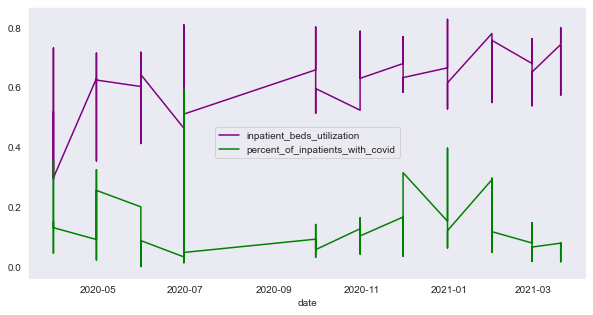

In [26]:
plt.rcParams["figure.figsize"] = (10,5)
import datetime
covidTableStrData.plot(x="date", y=['inpatient_beds_utilization', 'percent_of_inpatients_with_covid'],color=["purple","green","red"])

The percentage of inpatients (COVID Confirmed) and Total Inpatient Beds that were utilized during the period from March 2020 till March 2021 have a variable dependency. It was observed that the utilization percentage of inpatient beds (COVID Confirmed) saw a peak during March 2020 and July 2020 which was considered first and second wave of the pandemic in the United States.

<a id=section803></a>
## 8.3 Distribution of Pneumonia Deaths , Inpatient Beds Used based on Cities

In [27]:
fig = px.scatter_matrix(covidTableStrData,
    dimensions=["pneumoniadeaths", "inpatient_beds_used", "inpatient_beds_used_covid"],
    color="state_desc")
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))
fig.show()

California State has recorded most number of death due to Pneumonia, highest number of inpatient beds usage for COVID-19.

<a id=section804></a>
## 8.4 Connecticut Covid-19 Deaths

In [28]:
dm1 = covidTableStrData.sort_values(by=['date'])[covidTableStrData['residentstotaladmissionscovid19'].notnull()]
dm1

<ipython-input-28-563b57cfcba5>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



enddate    groups        state                 placeofdeath  agegroup  \
2  2020-05-31  By Month  Connecticut  Total - All Places of Death  All Ages   
0  2021-01-31  By Month  Connecticut  Total - All Places of Death  All Ages   
1  2021-02-28  By Month  Connecticut  Total - All Places of Death  All Ages   

   covid19deaths  totaldeaths  pneumoniadeaths  pneumoniaandcovid19deaths  \
2         1531.0       4015.0            477.0                      350.0   
0          979.0       3588.0            478.0                      371.0   
1          329.0       1427.0            184.0                      138.0   

   influenzadeaths  ...  inpatient_bed_covid_utilization  weekending  \
2              0.0  ...                         0.067901  2020-05-31   
0              0.0  ...                         0.123191  2021-01-31   
1              0.0  ...                         0.060395  2021-02-28   

  residentstotaladmissionscovid19 residentstotalconfirmedcovid19  \
2                          1489.0                         5939.0   
0                          5098.0                        11241.0   
1                          5577.0                        11438.0   

  residentstotalsuspectedcovid19  residentsweeklyalldeaths  \
2                         2605.0                     266.0   
0                         3598.0                     149.0   
1                         3598.0                     104.0   

   residentstotalalldeaths  residentstotalcovid19deaths  numberofallbeds  \
2                   2672.0                       1665.0          24540.0   
0                   6951.0                       2802.0          24533.0   
1                   7371.0                       2865.0          24533.0   

   totalnumberofoccupiedbeds  
2                    17766.0  
0                    17810.0  
1                    17923.0  

[3 rows x 48 columns]

In [29]:
dm2 = covidTableStrData.sort_values(by=['date'])[covidTableStrData['residentstotalconfirmedcovid19'].notnull()]
dm2

<ipython-input-29-42ae151e6834>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



enddate    groups        state                 placeofdeath  agegroup  \
2  2020-05-31  By Month  Connecticut  Total - All Places of Death  All Ages   
0  2021-01-31  By Month  Connecticut  Total - All Places of Death  All Ages   
1  2021-02-28  By Month  Connecticut  Total - All Places of Death  All Ages   

   covid19deaths  totaldeaths  pneumoniadeaths  pneumoniaandcovid19deaths  \
2         1531.0       4015.0            477.0                      350.0   
0          979.0       3588.0            478.0                      371.0   
1          329.0       1427.0            184.0                      138.0   

   influenzadeaths  ...  inpatient_bed_covid_utilization  weekending  \
2              0.0  ...                         0.067901  2020-05-31   
0              0.0  ...                         0.123191  2021-01-31   
1              0.0  ...                         0.060395  2021-02-28   

  residentstotaladmissionscovid19 residentstotalconfirmedcovid19  \
2                          1489.0                         5939.0   
0                          5098.0                        11241.0   
1                          5577.0                        11438.0   

  residentstotalsuspectedcovid19  residentsweeklyalldeaths  \
2                         2605.0                     266.0   
0                         3598.0                     149.0   
1                         3598.0                     104.0   

   residentstotalalldeaths  residentstotalcovid19deaths  numberofallbeds  \
2                   2672.0                       1665.0          24540.0   
0                   6951.0                       2802.0          24533.0   
1                   7371.0                       2865.0          24533.0   

   totalnumberofoccupiedbeds  
2                    17766.0  
0                    17810.0  
1                    17923.0  

[3 rows x 48 columns]

In [30]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=dm2["enddate"],
    y=dm2["residentstotaladmissionscovid19"],
    name='residentstotaladmissionscovid19',
    marker_color='#4f5266', text= dm2["residentstotaladmissionscovid19"],
    textposition='auto'
))
fig.add_trace(go.Bar(
    x=dm2["enddate"],
    y=dm2["residentstotalconfirmedcovid19"],
    
    name='residentstotalconfirmedcovid19',
    marker_color='#855d89', text= dm2["residentstotalconfirmedcovid19"], textposition='auto'
))
fig.add_trace(go.Bar(
    x=dm2["enddate"],
    y=dm2["residentstotalsuspectedcovid19"],
    
    name='residentstotalsuspectedcovid19',
    marker_color='#ce6086', text= dm2["residentstotalsuspectedcovid19"], textposition='auto'
))
fig.add_trace(go.Bar(
    x=dm2["enddate"],
    y=dm2["inpatient_beds_used"],
    name='inpatient_beds_used',
    marker_color='#ff735c', text= dm2["inpatient_beds_used"], textposition='auto'
))
fig.add_trace(go.Bar(
    x=dm2["enddate"],
    y=dm2["inpatient_beds_used_covid"],
    name='inpatient_beds_used_covid',
    marker_color='#ffa600', text= dm2["inpatient_beds_used_covid"], textposition='auto'
    
))

fig.update_layout(barmode = 'group',
    title={'text': "Connecticut Covid-19 Details",'y':0.9,'x':0.45,'xanchor': 'center', 'yanchor': 'top'}, xaxis = dict(type="category", categoryorder='category ascending'))

fig.show()


As of 28th February 2021, a huge increase in COVID confirmed cases were observed in Connecticut. However, the inpatient beds utilization for COVID-19 dwindled over the last 2 months. The plausible reason for this could be that, a significant time was spent in research to tackle crisis due to COVID, and it indicated that people preferred to self-isolate or home quarantine rather than getting admitted in the hospital.